# Using Historical Data to Predict Batting Success: Step 3 - Hall Of Fame Modelling

Authored by: Donna J. Harris (994042890)

Email: harr2890@mylaurier.ca

For: CP640 Machine Learning (S22) with Professor Elham Harirpoush

## Notebook Series

Just a word about the presentation of this project code.

The code is organized into a series of locally executed Jupyter notebooks, organized by step and needing to be executed in sequence. This is `harr2890_project_step3_hof_modelling`, the third of XXXXX notebooks.  TODO

## *Step 3 - Exploration and Modelling for a Hall of Fame Approach*

word words word TODO


## Environment Setup

Import and establish environment for our work, including showing all dataframe column values.

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

### Pre-Conditions

Steps 1-2 must be run completely before running this notebook.

The `data` folder must exist with the following prepared data files:
- `mlb_data..... TODO filename`
- `hof data..... TODO filename`

##  Loading Prepared Data Files

In [4]:
alldata_csv = "./data/step2_alldata.csv"
alldata = pd.read_csv(alldata_csv)
alldata

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee
0,aaronha01,Henry Aaron,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,0.305503,0.555152,0.374276,0.929429,1
1,abreubo01,Bobby Abreu,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85,0.291274,0.474764,0.394977,0.869741,0
2,adairje01,Jerry Adair,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,0.254292,0.346852,0.291598,0.638451,0
3,adamsbo03,Bobby Adams,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,0.269371,0.368695,0.339357,0.708052,0
4,adamsma01,Matt Adams,10,2614,2421,297,624,130,6,118,399,165,643,12,0,16,0.257745,0.462619,0.306427,0.769046,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,zernigu01,Gus Zernial,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,0.266244,0.488325,0.332186,0.820511,0
1815,zimmedo01,Don Zimmer,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14,0.235550,0.371970,0.290508,0.662478,0
1816,zimmery01,Ryan Zimmerman,16,7402,6654,963,1846,417,22,284,1061,646,1384,31,1,69,0.277427,0.474752,0.340946,0.815698,0
1817,ziskri01,Richie Zisk,13,5737,5144,681,1477,245,26,207,792,533,910,12,7,41,0.287131,0.465591,0.352880,0.818471,0


In [5]:
pre_2000_csv = "./data/step2_pre_2000.csv"
pre_2000 = pd.read_csv(pre_2000_csv)
pre_2000

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee
0,aaronha01,Henry Aaron,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,0.305503,0.555152,0.374276,0.929429,1
1,abreubo01,Bobby Abreu,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85,0.291274,0.474764,0.394977,0.869741,0
2,adairje01,Jerry Adair,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,0.254292,0.346852,0.291598,0.638451,0
3,adamsbo03,Bobby Adams,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,0.269371,0.368695,0.339357,0.708052,0
4,adamssp01,Sparky Adams,13,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,0.285714,0.353005,0.342606,0.695611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,zaungr01,Gregg Zaun,16,4042,3489,431,878,194,9,88,446,479,544,29,14,31,0.251648,0.388077,0.344091,0.732168,0
1510,zeileto01,Todd Zeile,16,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,0.264624,0.423346,0.346140,0.769487,0
1511,zernigu01,Gus Zernial,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,0.266244,0.488325,0.332186,0.820511,0
1512,zimmedo01,Don Zimmer,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14,0.235550,0.371970,0.290508,0.662478,0


In [6]:
from_2000_csv = "./data/step2_from_2000.csv"
from_2000 = pd.read_csv(from_2000_csv)
from_2000

,ID,Player,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee
0,adamsma01,Matt Adams,10,2614,2421,297,624,130,6,118,399,165,643,12,0,16,0.257745,0.462619,0.306427,0.769046,0
1,alonsyo01,Yonder Alonso,10,3773,3362,390,872,181,2,100,426,366,648,16,1,28,0.259369,0.403629,0.332450,0.736078,0
2,altuvjo01,Jose Altuve,11,6346,5778,883,1777,340,29,164,639,443,753,54,26,45,0.307546,0.461578,0.359810,0.821389,0
3,andinro01,Robert Andino,10,1491,1344,153,313,58,1,18,97,113,313,6,21,7,0.232887,0.317708,0.293878,0.611586,0
4,andruel01,Elvis Andrus,13,7620,6863,953,1864,328,50,79,673,547,1043,50,103,56,0.271601,0.368498,0.327435,0.695933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,youngde03,Delmon Young,10,4371,4108,473,1162,218,11,109,566,179,784,40,1,43,0.282863,0.420886,0.316018,0.736904,0
301,younger03,Eric Young Jr.,10,1926,1725,253,422,67,22,13,112,147,350,23,26,5,0.244638,0.331594,0.311579,0.643173,0
302,youngmi02,Michael Young,14,8612,7918,1136,2375,441,60,185,1030,575,1235,22,25,72,0.299949,0.440894,0.346105,0.786999,0
303,zimmery01,Ryan Zimmerman,16,7402,6654,963,1846,417,22,284,1061,646,1384,31,1,69,0.277427,0.474752,0.340946,0.815698,0


## Extract X and y Data from `pre_2000`

`pre_2000` has 1514 records, which will be split into training and testing data later.

`pre_2000` has 21 columns, the first two (`ID` and `Player`) are for identification purposes and last column (`Inductee`) is our label. This leaves 18 feature columns for consideration. Also, note that four of the columns (the calculated statistics) are based on other features in the data.

We can extract those 18 feature columns into `X`:

In [97]:
num = pre_2000.shape[1]
X = pre_2000[pre_2000.columns[2:num-1]]
X

,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS
0,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,0.305503,0.555152,0.374276,0.929429
1,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85,0.291274,0.474764,0.394977,0.869741
2,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,0.254292,0.346852,0.291598,0.638451
3,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,0.269371,0.368695,0.339357,0.708052
4,13,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,0.285714,0.353005,0.342606,0.695611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,16,4042,3489,431,878,194,9,88,446,479,544,29,14,31,0.251648,0.388077,0.344091,0.732168
1510,16,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,0.264624,0.423346,0.346140,0.769487
1511,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,0.266244,0.488325,0.332186,0.820511
1512,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14,0.235550,0.371970,0.290508,0.662478


We capture the column/feature names into `X_features`:

In [98]:
X_features = X.columns.values.tolist()
X_features

['Number of Seasons',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'HBP',
 'SH',
 'SF',
 'AVG',
 'SLG',
 'OBP',
 'OPS']

Let's shorten the name of the first feature to 'Seas':

In [123]:
X_features[0] = 'Seas'
X_features

['Seas',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'HBP',
 'SH',
 'SF',
 'AVG',
 'SLG',
 'OBP',
 'OPS']

And, finally, modify the format of `X` to be an array ready for working with `scikit-learn`.

In [99]:
X = X.values
X

array([[2.30000000e+01, 1.36660000e+04, 1.21210000e+04, ...,
        5.55152215e-01, 3.74276292e-01, 9.29428507e-01],
       [1.80000000e+01, 1.00810000e+04, 8.48000000e+03, ...,
        4.74764151e-01, 3.94977169e-01, 8.69741320e-01],
       [1.30000000e+01, 4.31400000e+03, 4.01900000e+03, ...,
        3.46852451e-01, 2.91598409e-01, 6.38450859e-01],
       ...,
       [1.10000000e+01, 4.36100000e+03, 3.94000000e+03, ...,
        4.88324873e-01, 3.32186281e-01, 8.20511154e-01],
       [1.20000000e+01, 3.52300000e+03, 3.21800000e+03, ...,
        3.71970168e-01, 2.90507600e-01, 6.62477767e-01],
       [1.30000000e+01, 5.73700000e+03, 5.14400000e+03, ...,
        4.65590980e-01, 3.52879581e-01, 8.18470561e-01]])

Similarly for `y`, we'll extract the label column:

In [100]:
y = pre_2000[['Inductee']]
y

,Inductee
0,1
1,0
2,0
3,0
4,0
...,...
1509,0
1510,0
1511,0
1512,0


Extract the label name:

In [101]:
y_label_name = y.columns.values.tolist()
y_label_name

['Inductee']

Then, finally, prepare `y` for use with `scikit-learn`.

In [102]:
y = pre_2000[y_label_name[0]].values
y

array([1, 0, 0, ..., 0, 0, 0])

### Extraction of X, excluding the calculated statistics

In [138]:
num = pre_2000.shape[1]
X_nc = pre_2000[pre_2000.columns[2:num-5]]
X_nc

,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF
0,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120
1,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85
2,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30
3,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5
4,13,6175,5558,839,1588,249,49,9,390,453,222,28,95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,16,4042,3489,431,878,194,9,88,446,479,544,29,14,31
1510,16,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81
1511,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20
1512,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14


In [139]:
X_nc_features = X_nc.columns.values.tolist()
X_nc_features

['Number of Seasons',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'HBP',
 'SH',
 'SF']

In [140]:
X_nc_features[0] = 'Seas'
X_nc_features

['Seas',
 'PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'HBP',
 'SH',
 'SF']

In [141]:
X_nc = X_nc.values
X_nc

array([[   23, 13666, 12121, ...,    32,    21,   120],
       [   18, 10081,  8480, ...,    33,     7,    85],
       [   13,  4314,  4019, ...,    17,    41,    30],
       ...,
       [   11,  4361,  3940, ...,    24,     2,    20],
       [   12,  3523,  3218, ...,    13,    36,    14],
       [   13,  5737,  5144, ...,    12,     7,    41]])

## Taking Steps Toward a Model

`pre_2000` (We are reserving `from_2000`, with its 305 records, for independent testing.)

It also has 21 columns, the first two (`ID` and `Player`) are for identification purposes and last column (`Inductee`) is our label. This leaves 18 feature columns for consideration. Also, note that four of the columns (the calculated statistics) are based on other features in the data.

This multi-dimensionality might need to be reduced in order to avoid overfitting. 

REFERENCE: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py


"This example shows the use of a forest of trees to evaluate the importance of features on an artificial classification task. The blue bars are the feature importances of the forest, along with their inter-trees variability represented by the error bars."

Our approach uses a forest of trees to evaluate the importance of features, where the blue bars are the feature importances of the forest and the black lines show variability.

First, we'll split the `pre_2000` data.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Then, we'll create a Random Forest Classifier to help determine feature importance.

In [112]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Next, we glean the importances from the forest classifier, first using a "Mean Decrease in Impurity" (or MDI) approach.

In [113]:
import numpy as np

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

Finally, we can examine feature importances visually.

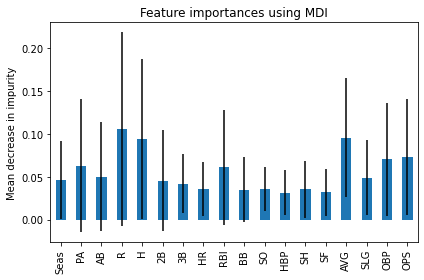

In [127]:
import pandas as pd
import matplotlib.pyplot as plt


forest_importances = pd.Series(importances, index=X_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Let's look at importances in another way, using a "Permutation" approach.

In [125]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_features)

And then visualizing the results:

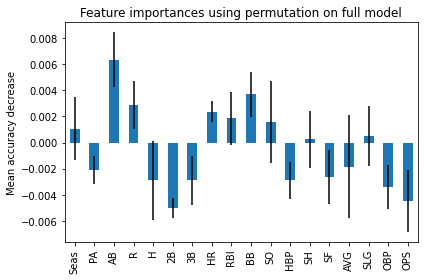

In [126]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

There are some interesting discrepencies, so let's remove the calculated statistics and see what the impact is.

In [142]:
X_nc_train, X_nc_test, y_train, y_test = train_test_split(X_nc, y, stratify=y, random_state=42)

In [143]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_nc_train, y_train)

RandomForestClassifier(random_state=0)

In [145]:
import numpy as np

nc_importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

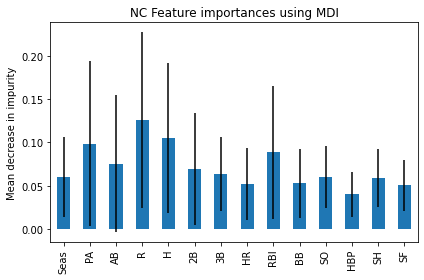

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

forest_nc_importances = pd.Series(nc_importances, index=X_nc_features)

fig, ax = plt.subplots()
forest_nc_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("NC Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [149]:
from sklearn.inspection import permutation_importance

nc_result = permutation_importance(
    forest, X_nc_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_nc_importances = pd.Series(nc_result.importances_mean, index=X_nc_features)

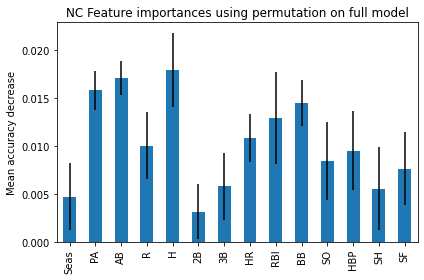

In [150]:
fig, ax = plt.subplots()
forest_nc_importances.plot.bar(yerr=nc_result.importances_std, ax=ax)
ax.set_title("NC Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Best guesses....
Try: R, H, RBI, AB (came up 3x) and BB, PA (came up 2x)

## Redefining X

In [154]:
num = pre_2000.shape[1]

X_1_features = ['PA', 'AB', 'H', 'R', 'RBI', 'BB']

X_1 = pre_2000[X_1_features]
X_1

,PA,AB,H,R,RBI,BB
0,13666,12121,3703,2128,2243,1372
1,10081,8480,2470,1453,1363,1476
2,4314,4019,1022,376,365,207
3,4335,3846,1036,557,294,394
4,6175,5558,1588,839,390,453
...,...,...,...,...,...,...
1509,4042,3489,878,431,446,479
1510,8649,7573,2004,986,1110,945
1511,4361,3940,1049,551,749,375
1512,3523,3218,758,342,348,242


In [155]:
X_1 = X_1.values
X_1

array([[13666, 12121,  3703,  2128,  2243,  1372],
       [10081,  8480,  2470,  1453,  1363,  1476],
       [ 4314,  4019,  1022,   376,   365,   207],
       ...,
       [ 4361,  3940,  1049,   551,   749,   375],
       [ 3523,  3218,   758,   342,   348,   242],
       [ 5737,  5144,  1477,   681,   792,   533]])

## Modelling...

### QUICK personal sanity check...

In [36]:
y = pre_2000['Inductee']
y

0       1
1       0
2       0
3       0
4       0
       ..
1509    0
1510    0
1511    0
1512    0
1513    0
Name: Inductee, Length: 1514, dtype: int64

In [38]:
y_col = 'Inductee'
y_col

'Inductee'

In [39]:
y = y.values
y

array([1, 0, 0, ..., 0, 0, 0])

In [31]:
num = pre_2000.shape[1]
X = pre_2000[pre_2000.columns[2:num-1]]
X

,Number of Seasons,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS
0,23,13666,12121,2128,3703,614,96,740,2243,1372,1357,32,21,120,0.305503,0.555152,0.374276,0.929429
1,18,10081,8480,1453,2470,574,59,288,1363,1476,1840,33,7,85,0.291274,0.474764,0.394977,0.869741
2,13,4314,4019,376,1022,163,19,57,365,207,497,17,41,30,0.254292,0.346852,0.291598,0.638451
3,14,4335,3846,557,1036,180,47,36,294,394,426,16,74,5,0.269371,0.368695,0.339357,0.708052
4,13,6175,5558,839,1588,249,49,9,390,453,222,28,95,0,0.285714,0.353005,0.342606,0.695611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,16,4042,3489,431,878,194,9,88,446,479,544,29,14,31,0.251648,0.388077,0.344091,0.732168
1510,16,8649,7573,986,2004,397,23,253,1110,945,1279,42,8,81,0.264624,0.423346,0.346140,0.769487
1511,11,4361,3940,551,1049,152,21,227,749,375,731,24,2,20,0.266244,0.488325,0.332186,0.820511
1512,12,3523,3218,342,758,127,21,90,348,242,662,13,36,14,0.235550,0.371970,0.290508,0.662478


In [33]:
X_col = X.columns
X_col

Index(['Number of Seasons', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI',
       'BB', 'SO', 'HBP', 'SH', 'SF', 'AVG', 'SLG', 'OBP', 'OPS'],
      dtype='object')

In [40]:
X = X.values
X

array([[2.30000000e+01, 1.36660000e+04, 1.21210000e+04, ...,
        5.55152215e-01, 3.74276292e-01, 9.29428507e-01],
       [1.80000000e+01, 1.00810000e+04, 8.48000000e+03, ...,
        4.74764151e-01, 3.94977169e-01, 8.69741320e-01],
       [1.30000000e+01, 4.31400000e+03, 4.01900000e+03, ...,
        3.46852451e-01, 2.91598409e-01, 6.38450859e-01],
       ...,
       [1.10000000e+01, 4.36100000e+03, 3.94000000e+03, ...,
        4.88324873e-01, 3.32186281e-01, 8.20511154e-01],
       [1.20000000e+01, 3.52300000e+03, 3.21800000e+03, ...,
        3.71970168e-01, 2.90507600e-01, 6.62477767e-01],
       [1.30000000e+01, 5.73700000e+03, 5.14400000e+03, ...,
        4.65590980e-01, 3.52879581e-01, 8.18470561e-01]])

In [44]:
X[0]

array([2.30000000e+01, 1.36660000e+04, 1.21210000e+04, 2.12800000e+03,
       3.70300000e+03, 6.14000000e+02, 9.60000000e+01, 7.40000000e+02,
       2.24300000e+03, 1.37200000e+03, 1.35700000e+03, 3.20000000e+01,
       2.10000000e+01, 1.20000000e+02, 3.05502846e-01, 5.55152215e-01,
       3.74276292e-01, 9.29428507e-01])

## Modelling (Selection? Experimentation?)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_knn = sc.fit_transform(X)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_knn, y, test_size = 0.2, random_state = 20)

# Import k-nearest neighbor 
from sklearn.neighbors import KNeighborsClassifier

# Build a k-nearest neighbor object
knn = KNeighborsClassifier(n_neighbors = 2)

# Train(fit) model
knn.fit(X_train, y_train)


# Predict both training and test data with the fitted model
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)



In [17]:
y_test_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [18]:
y_train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
X

array([[2.30000000e+01, 1.36660000e+04, 1.21210000e+04, ...,
        5.55152215e-01, 3.74276292e-01, 9.29428507e-01],
       [1.80000000e+01, 1.00810000e+04, 8.48000000e+03, ...,
        4.74764151e-01, 3.94977169e-01, 8.69741320e-01],
       [1.30000000e+01, 4.31400000e+03, 4.01900000e+03, ...,
        3.46852451e-01, 2.91598409e-01, 6.38450859e-01],
       ...,
       [1.10000000e+01, 4.36100000e+03, 3.94000000e+03, ...,
        4.88324873e-01, 3.32186281e-01, 8.20511154e-01],
       [1.20000000e+01, 3.52300000e+03, 3.21800000e+03, ...,
        3.71970168e-01, 2.90507600e-01, 6.62477767e-01],
       [1.30000000e+01, 5.73700000e+03, 5.14400000e+03, ...,
        4.65590980e-01, 3.52879581e-01, 8.18470561e-01]])

In [27]:
#pip install seaborn

X  has  ... ??? [2.30000000e+01 1.36660000e+04 1.21210000e+04 2.12800000e+03
 3.70300000e+03 6.14000000e+02 9.60000000e+01 7.40000000e+02
 2.24300000e+03 1.37200000e+03 1.35700000e+03 3.20000000e+01
 2.10000000e+01 1.20000000e+02 3.05502846e-01 5.55152215e-01
 3.74276292e-01 9.29428507e-01]


ValueError: X has 2 features, but KNeighborsClassifier is expecting 18 features as input.

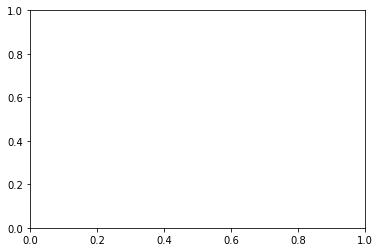

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

# n_neighbors = 15
n_neighbors = 2

# # import some data to play with
# iris = datasets.load_iris()

# # we only take the first two features. We could avoid this ugly
# # slicing by using a two-dim dataset
# X = iris.data[:, :2]
# y = iris.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    print("X  has  ... ???", X[0])
    

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        #xlabel=iris.feature_names[0],
        #ylabel=iris.feature_names[1],
        xlabel=['x-label'],
        ylabel=['y-label'],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        #hue=iris.target_names[y],
        hue=['a', 'b'],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        #"3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
        "2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()